In [1]:
# Install required packages
!pip install pandas numpy seaborn matplotlib scikit-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [3]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
df = pd.read_csv(url, names=columns)

In [4]:
# Drop ID column
df.drop(columns=['ID'], inplace=True)


In [5]:
# Encode target variable (M=1 for Malignant, B=0 for Benign)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

In [6]:
# Split dataset into features and target
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

In [7]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [8]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_prob_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]

In [10]:
# Logistic Regression Evaluation
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg) * 100:.2f}%")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_prob_log_reg) * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Results:
Accuracy: 96.49%
AUC-ROC: 99.60%
Confusion Matrix:
[[71  1]
 [ 3 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



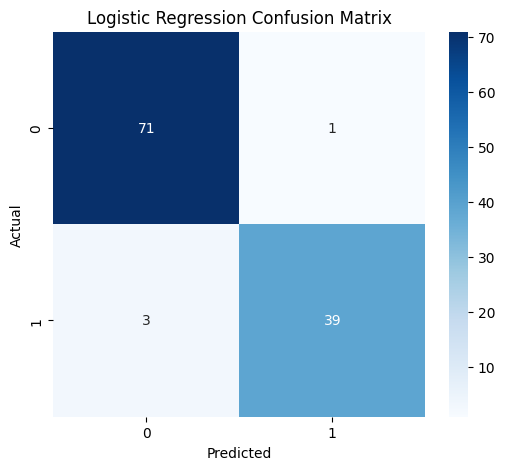

In [11]:
# Visualizations
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


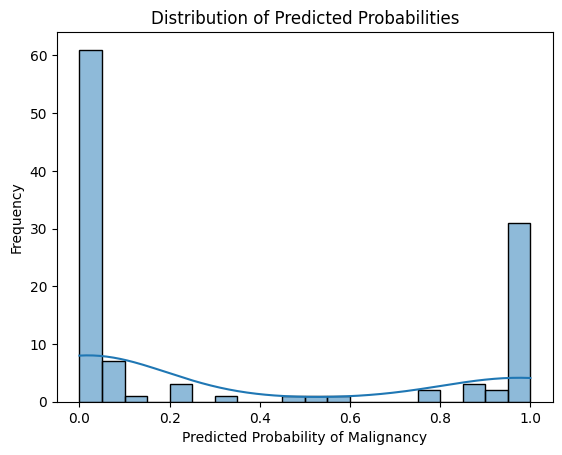

In [12]:
sns.histplot(y_pred_prob_log_reg, kde=True, bins=20)
plt.xlabel("Predicted Probability of Malignancy")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities")
plt.show()